In [1]:
#Install Kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanherrerat","key":"15a7a3114ed2cedba610cb019d030e68"}'}

In [3]:
#Create a kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                           DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36           1237        136  1.0              
muhammadbinimran/housing-price-prediction-data            Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           4878         93  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset            LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1507        115  1.0              
thedrcat/daigt-proper-train-dataset                       DAIGT Proper Train Dataset           

In [7]:
! kaggle datasets download -d alanherrerat/unsupervised-fruits-dataset

 99% 1.60G/1.61G [00:21<00:00, 102MB/s] 
100% 1.61G/1.61G [00:21<00:00, 80.0MB/s]


In [8]:
!unzip \*.zip  && rm *.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.08.22 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.08.26 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.08.43 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.08.54 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.08.59 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.09.05 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.09.09 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.09.22 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.09.29 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.09.55 PM.png  
  inflating: dataset/train/rotated_by_75_Screen Shot 2018-06-12 at 9.10.04 PM.png  
  inflati

In [9]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [11]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

except OSError:
    pass


In [12]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))

      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))

In [13]:
dataset_train_dir = '/content/dataset/train'
dataset_test_dir = '/content/dataset/test'

In [14]:
import shutil


source_folder = '/content/dataset/train'
destination_folder = '/tmp/fruit-dataset/train'

source_folder2 = '/content/dataset/test'
destination_folder2 = '/tmp/fruit-dataset/test'

source_folder3 = '//content/dataset/valid'
destination_folder3 = '/tmp/fruit-dataset/val'


shutil.rmtree(destination_folder, ignore_errors=True)

shutil.rmtree(destination_folder2, ignore_errors=True)

shutil.rmtree(destination_folder3, ignore_errors=True)

shutil.copytree(source_folder, destination_folder)

shutil.copytree(source_folder2, destination_folder2)

shutil.copytree(source_folder3, destination_folder3)


'/tmp/fruit-dataset/val'

In [15]:
fruits_train_dir = '/tmp/fruit-dataset/train'
fruits_val_dir = '/tmp/fruit-dataset/test'
fruits_test_dir = '/tmp/fruit-dataset/val'

In [16]:
print(len(os.listdir(fruits_train_dir)))
print(len(os.listdir(fruits_val_dir)))
print(len(os.listdir(fruits_test_dir)))

9709
1293
1405


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5, 1.0],
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)


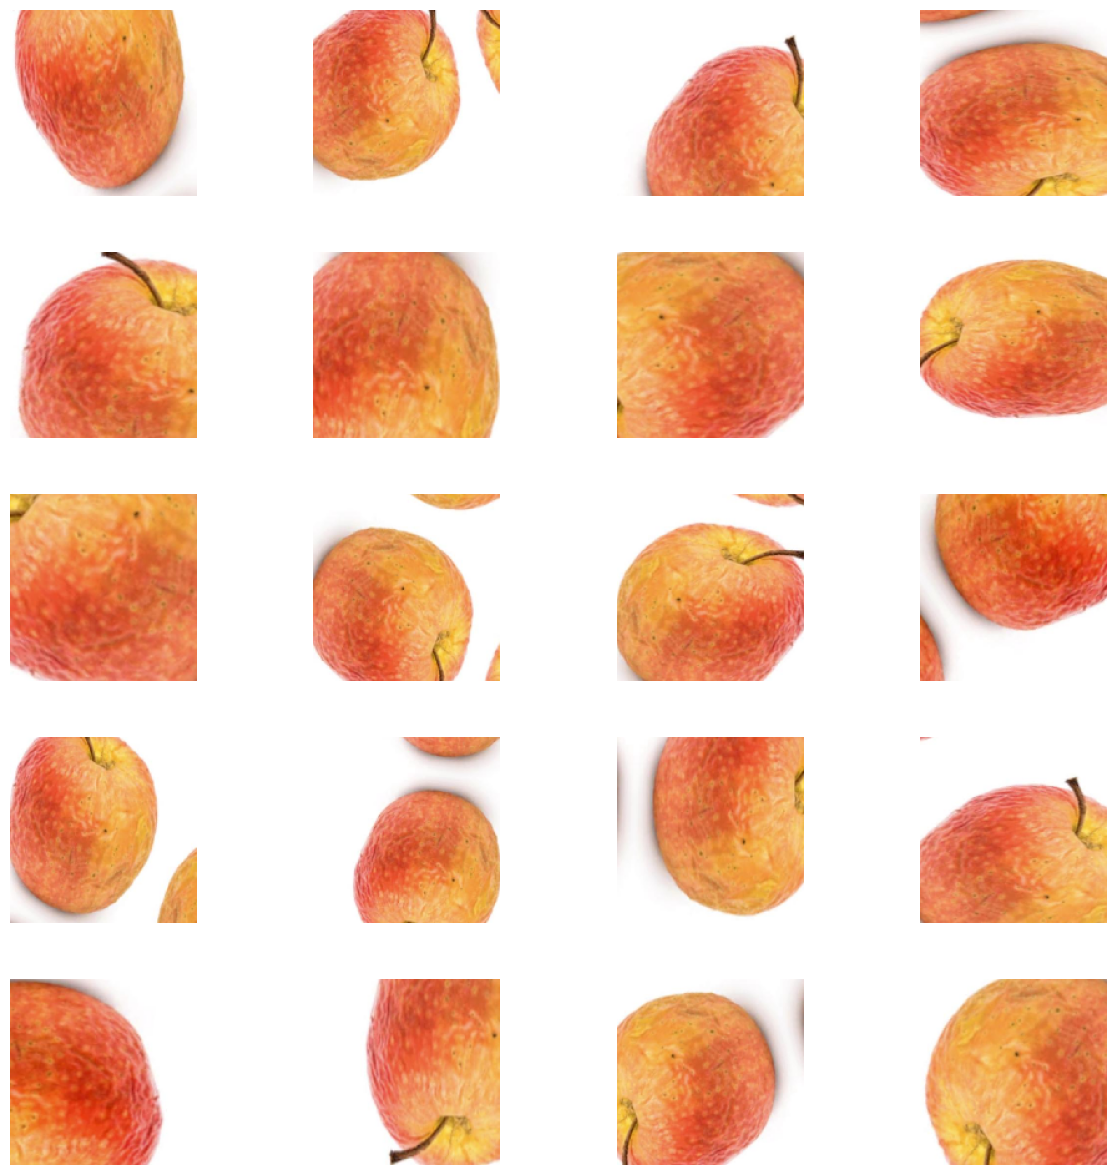

In [18]:
import math
path_aug = os.path.join(fruits_train_dir, os.listdir(fruits_train_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruits', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot(math.ceil(len(preview_img)/4), 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [19]:
import pandas as pd
import os

file_names = os.listdir('/tmp/fruit-dataset/train')

df = pd.DataFrame({
    'filename': file_names,
    'class': [f'image_{i}' for i in range(len(file_names))]
})

print(df.head())

unsupervised_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='/tmp/fruit-dataset/train',
    x_col='filename',
    y_col='class',
    batch_size=32,
    color_mode="rgb",
    shuffle=False,
    target_size=(150, 150),
    class_mode=None
)

                                            filename    class
0  saltandpepper_Screen Shot 2018-06-08 at 2.26.4...  image_0
1  rotated_by_45_Screen Shot 2018-06-12 at 9.11.0...  image_1
2  rotated_by_75_Screen Shot 2018-06-12 at 9.40.1...  image_2
3  rotated_by_60_Screen Shot 2018-06-12 at 9.13.0...  image_3
4  rotated_by_60_Screen Shot 2018-06-13 at 12.10....  image_4
Found 9709 validated image filenames.


In [20]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('validation_loss') < 0.1):  # Ajusta según tus necesidades
            print("\nReached a satisfactory performance. Stop Training")
            self.model.stop_training = True

callbacks = MyCallback()


In [23]:
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')


latent_space_train = model.predict(unsupervised_generator)


num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=42)
clusters = kmeans.fit_predict(latent_space_train)



304/304 [==============================] - 240s 788ms/step


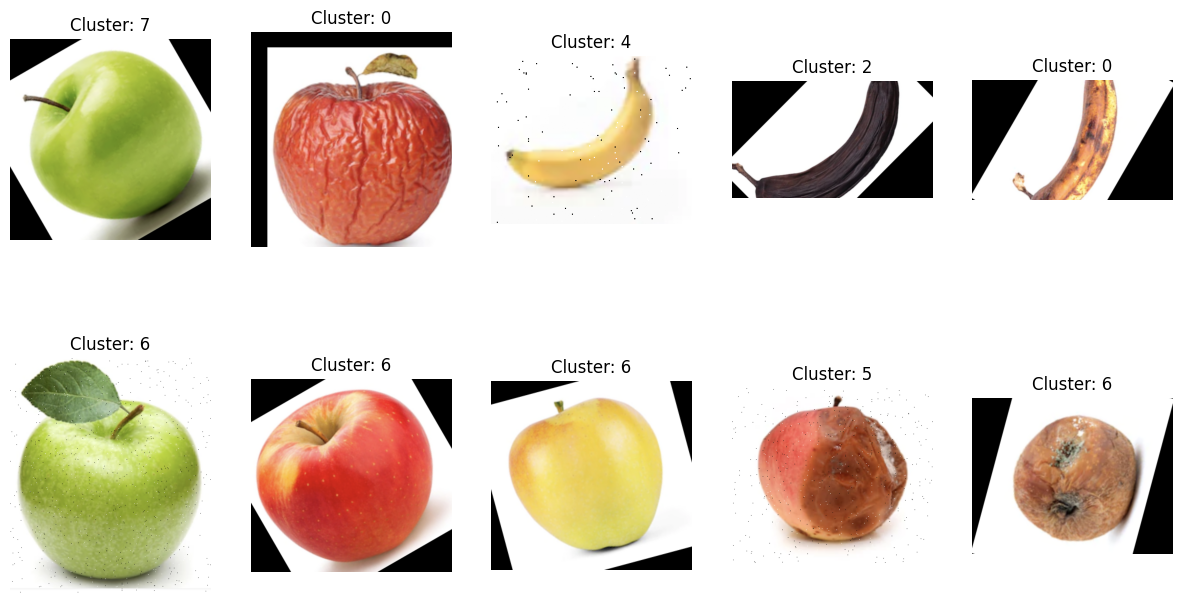

In [22]:
import matplotlib.pyplot as plt
import numpy as np

df['cluster'] = clusters

num_samples = 10
selected_samples = df.sample(num_samples)

plt.figure(figsize=(15, 8))
for i, (_, row) in enumerate(selected_samples.iterrows()):
    plt.subplot(2, 5, i + 1)
    img_path = os.path.join('/tmp/fruit-dataset/train', row['filename'])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f'Cluster: {row["cluster"]}')
    plt.axis('off')

plt.show()

Silhouette Score: 0.052262987941503525
Inertia: 1418.896484375


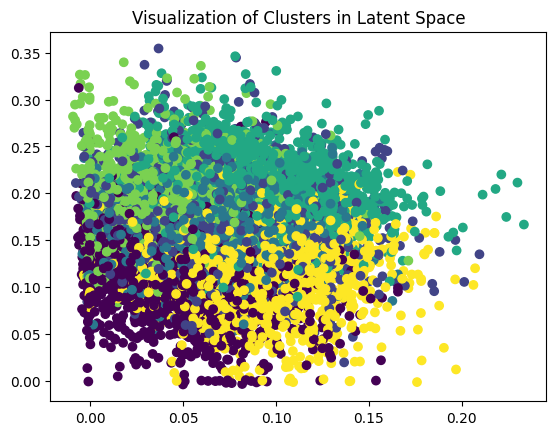

In [24]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(latent_space_train, clusters)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia: {kmeans.inertia_}")

plt.scatter(latent_space_train[:, 0], latent_space_train[:, 1], c=clusters, cmap='viridis')
plt.title('Visualization of Clusters in Latent Space')
plt.show()